In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [9]:
# x^2 + y^2 + z^2 = R^2
radius = 100 
x = np.arange(0, radius, 0.1)
y = np.arange(radius, 0 , -0.1)
z = (radius ** 2 - x ** 2 - y ** 2) ** (1/2)
x = np.vstack((x,y,z)).T
print (x)

[[   0.          100.            0.        ]
 [   0.1          99.9           4.46989933]
 [   0.2          99.8           6.3182276 ]
 ..., 
 [  99.7           0.3           7.73433902]
 [  99.8           0.2           6.3182276 ]
 [  99.9           0.1           4.46989933]]


In [10]:
def norm(x):
    means, stds = x.mean(axis = 0), x.std(axis = 0)
    x = (x - means) / stds
    return x, (means, stds)

In [11]:
def transform(x, n_components):
    cov = np.dot(x.T, x)
    a, v = np.linalg.eig(cov)
    index = np.argsort(-a)
    v = v[:,index]
    return np.dot(x, v[:,:n_components]), v[:,:n_components]

In [12]:
def restore(x, v, norm_params):
    x = np.dot(x, v.T) 
    means, stds = norm_params
    x = x * stds + means
    return x

In [13]:
def error(x1,x2):
    return np.ndarray.sum((x1-x2)**2)

In [14]:
def plot(x, x_restored, number_of_components):
    plt.figure()
    plt.scatter(x[:, 0], x[:, 2], color='c', label='Initial')
    plt.scatter(x_restored[:, 0], x_restored[:, 2], color='y', label='Restored')
    plt.legend(loc='best')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Number of components: ' + str(number_of_components))
    plt.show()

[[  -0.61477903  100.61477903   55.19723331]
 [  -0.46500503  100.46500503   55.19823135]
 [  -0.34442756  100.34442756   55.19903483]
 ..., 
 [  99.16395954    0.83604046   55.86212025]
 [  99.24818084    0.75181916   55.86268147]
 [  99.32758852    0.67241148   55.86321061]]


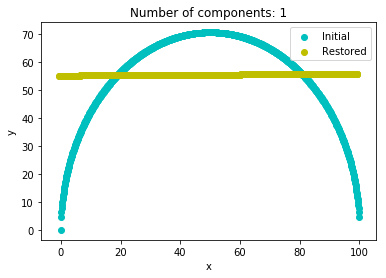

[[  1.42108547e-14   1.00000000e+02  -7.10542736e-15]
 [  1.00000000e-01   9.99000000e+01   4.46989933e+00]
 [  2.00000000e-01   9.98000000e+01   6.31822760e+00]
 ..., 
 [  9.97000000e+01   3.00000000e-01   7.73433902e+00]
 [  9.98000000e+01   2.00000000e-01   6.31822760e+00]
 [  9.99000000e+01   1.00000000e-01   4.46989933e+00]]


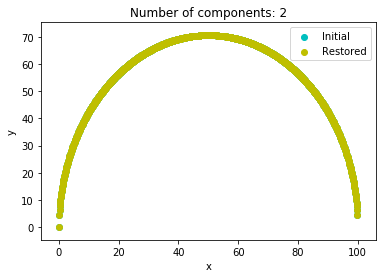

In [15]:
for number_of_components in (1,2):
    x_normed, norm_params = norm(x)
    x_transformed, v = transform(x_normed, number_of_components)
    x_restored = restore(x_transformed, v, norm_params)
    print (x_restored)
    plot(x,x_restored,number_of_components)